In [1]:
import arxiv
from sentence_transformers import SentenceTransformer
import umap
import nltk
nltk.download('punkt')

c:\Users\marin\anaconda3\envs\clust-arc\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\marin\anaconda3\envs\clust-arc\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
c:\Users\marin\anaconda3\envs\clust-arc\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
c:\Users\marin\anaconda3\envs\clust-arc\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\marin\anaconda3\envs\clust-arc\lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. Se

True

In [2]:
import urllib, urllib.request
from bs4 import BeautifulSoup
url = 'https://export.arxiv.org/api/query?search_query=au:robert+koenig&cat:quant-ph&start=0&max_results=59'
with urllib.request.urlopen(url) as response:
    soup = BeautifulSoup(response, "lxml")
    

In [3]:
titles = soup.find_all('title')
titles = list(map(lambda x:x.text, titles))
del titles[0]

titles[-1]

'Locking of accessible information and implications for the security of\n  quantum cryptography'

In [4]:
summaries = soup.find_all('summary')
summaries = list(map(lambda x:x.text, summaries))
summaries[-1]

"  The unconditional security of a quantum key distribution protocol is often\ndefined in terms of the accessible information, that is, the maximum mutual\ninformation between the distributed key S and the outcome of an optimal\nmeasurement on the adversary's (quantum) system. We show that, even if this\nquantity is small, certain parts of the key S might still be completely\ninsecure when S is used in applications, such as for one-time pad encryption.\nThis flaw is due to a locking property of the accessible information: one\nadditional (physical) bit of information might increase the accessible\ninformation by more than one bit.\n"

In [5]:
def retrieve_name(name):
    split_name = name.split(' ', 1)
    return True if split_name[0] == "Robert" or split_name[1] == "Koenig" else False

names = soup.find_all('name')
names = list(map(lambda x:x.text, names))
names = list(filter(retrieve_name, names))
del names[names.index('Robert Howe')]

indices = list([names.index('Alexander Koenig'), names.index('Robert A. Bridges')])
indices

[33, 15]

In [6]:
pdfs = ['http://arxiv.org/abs/1304.7031v1.pdf', 'http://arxiv.org/abs/0901.1333v2.pdf', 'http://arxiv.org/abs/0910.2427v2.pdf', 'http://arxiv.org/abs/1608.04305v2.pdf', 'http://arxiv.org/abs/0804.3070v1.pdf', 'http://arxiv.org/abs/quant-ph/0703210v1.pdf']

In [7]:
titles_to_remove = list()
summaries_to_remove = list()

for index in indices:
    titles_to_remove.append(titles[index])
    summaries_to_remove.append(summaries[index])
    
for title, summary in zip(titles_to_remove, summaries_to_remove):
    titles.remove(title)
    summaries.remove(summary)

In [8]:
search = arxiv.Search(query = "quantum", max_results=500, sort_by=arxiv.SortCriterion.SubmittedDate)

In [9]:
papers = list()
for result in search.results():
    papers.append(result.title + '.' + '\n\n' + result.summary)
    
for title, summary in zip(titles, summaries):
    papers.append(title + '.' + '\n\n' + summary)

In [10]:
len(papers)

557

In [11]:
print(papers[0])

2D Hamiltonians with exotic bipartite and topological entanglement.

We present a class of exactly solvable 2D models whose ground states violate
conventional beliefs about entanglement scaling in quantum matter. These
beliefs are (i) that area law entanglement scaling originates from local
correlations proximate to the boundary of the entanglement cut, and (ii) that
ground state entanglement in 2D Hamiltonians cannot violate area law scaling by
more than a multiplicative logarithmic factor. We explicitly present two
classes of models defined by local, translation-invariant Hamiltonians, whose
ground states can be exactly written as weighted superpositions of framed loop
configurations. The first class of models exhibits area-law scaling, but of an
intrinsically nonlocal origin so that the topological entanglement entropy
scales with subsystem sizes. The second class of models has a rich ground state
phase diagram that includes a phase exhibiting volume law entanglement.


In [12]:
#tokenize text into sentences
tokenized_papers = [nltk.sent_tokenize(paper) for paper in papers]

In [13]:
tokenized_papers[0]

['2D Hamiltonians with exotic bipartite and topological entanglement.',
 'We present a class of exactly solvable 2D models whose ground states violate\nconventional beliefs about entanglement scaling in quantum matter.',
 'These\nbeliefs are (i) that area law entanglement scaling originates from local\ncorrelations proximate to the boundary of the entanglement cut, and (ii) that\nground state entanglement in 2D Hamiltonians cannot violate area law scaling by\nmore than a multiplicative logarithmic factor.',
 'We explicitly present two\nclasses of models defined by local, translation-invariant Hamiltonians, whose\nground states can be exactly written as weighted superpositions of framed loop\nconfigurations.',
 'The first class of models exhibits area-law scaling, but of an\nintrinsically nonlocal origin so that the topological entanglement entropy\nscales with subsystem sizes.',
 'The second class of models has a rich ground state\nphase diagram that includes a phase exhibiting volume 

In [16]:
# count number of sentences in each paper
num_sentences = [len(paper) for paper in tokenized_papers]
num_sentences[0]

6

In [17]:
# remove papers with less than 6 sentences in the abstract
valid_papers = list()
for i in range(len(papers)):
    if num_sentences[i] > 6:
        valid_papers.append(papers[i])

In [18]:
len(valid_papers)

323

In [19]:
tokenized_valid_papers = [nltk.sent_tokenize(paper) for paper in valid_papers]

In [20]:
import numpy as np
vidx = np.argmin([len(paper) for paper in tokenized_valid_papers])
print(vidx)

1


In [24]:
print(valid_papers[vidx])
print(len(tokenized_valid_papers[vidx]))

Bosonic orbital Su-Schrieffer-Heeger model in a lattice of rings.

We study the topological properties of interacting and non-interacting bosons
loaded in the orbital angular momentum states $l=1$ in a lattice of rings with
alternating distances. At the single-particle level, the two circulation states
within each site lead to two decoupled Su-Schrieffer-Heeger lattices with
correlated topological phases. We characterize the topological configuration of
these lattices in terms of the alternating distances, as well as their
single-particle spectrum and topologically protected edge states. Secondly, we
add on-site interactions for the two-boson case, which lead to the appearance
of multiple bound states and edge bound states. We investigate the doublon
bands in terms of a strong-link model and we analyze the resulting subspaces
using perturbation theory in the limit of strong interactions. All analytical
results are benchmarked against exact diagonalization simulations.
7


In [25]:
import numpy as np
min = np.min([len(paper) for paper in tokenized_valid_papers])
print(min)

7


In [26]:
embeddings = list()
model = SentenceTransformer('all-MiniLM-L6-v2')
for token_paper in tokenized_valid_papers:
    embeddings.append(model.encode(token_paper))

In [27]:
reducer = umap.UMAP(n_neighbors=6, init='random', n_components=2)
umap_embeddings=list(map(lambda x:reducer.fit_transform(x), embeddings))

In [28]:
# Convert umap_embeddings to a 2D array
umap_embeddings_array = [emb[0] for emb in umap_embeddings]

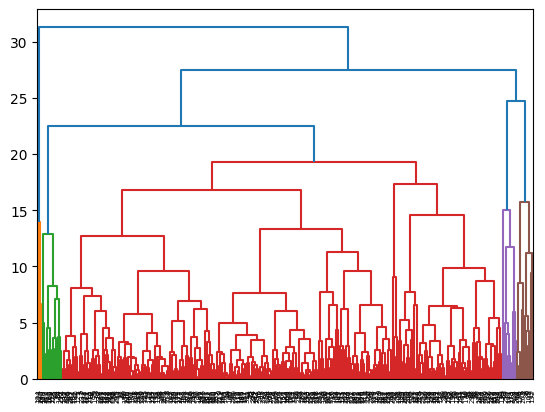

In [30]:
import scipy.cluster.hierarchy as sch

# Perform hierarchical clustering
distance_matrix = sch.distance.pdist(umap_embeddings_array)  # Compute pairwise distances
linkage = sch.linkage(distance_matrix, method='average')  # Perform average linkage
dendrogram = sch.dendrogram(linkage)

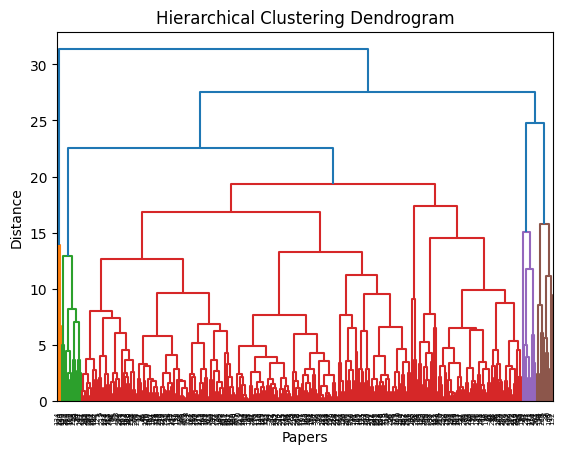

In [32]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

# Perform hierarchical clustering
distance_matrix = sch.distance.pdist(umap_embeddings_array)  # Compute pairwise distances
linkage = sch.linkage(distance_matrix, method='average')  # Perform average linkage
dendrogram = sch.dendrogram(linkage)
# Plot the dendrogram
plt.xlabel('Papers')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

# We can see almost nothing, so let't try this approach but just for Koenig's papers

In [52]:
def retrieve_name(name):
    split_name = name.split(' ', 1)
    return True if split_name[0] == "Robert" or split_name[1] == "Koenig" else False

In [53]:
names = soup.find_all('name')
names = list(map(lambda x:x.text, names))
names = list(filter(retrieve_name, names))
del names[names.index('Robert Howe')]

In [54]:
len(names)

59

In [55]:
indices = list([names.index('Alexander Koenig'), names.index('Robert A. Bridges')])
indices

[33, 15]

In [56]:
# Remove indices from names
for index in indices:
    names.remove(names[index])

In [57]:
len(names)

57

In [59]:
koenig_papers = list()
 
for title, summary in zip(titles, summaries):
    koenig_papers.append(title + '.' + '\n\n' + summary)

In [60]:
print(len(koenig_papers))
print(papers[0])

57
2D Hamiltonians with exotic bipartite and topological entanglement.

We present a class of exactly solvable 2D models whose ground states violate
conventional beliefs about entanglement scaling in quantum matter. These
beliefs are (i) that area law entanglement scaling originates from local
correlations proximate to the boundary of the entanglement cut, and (ii) that
ground state entanglement in 2D Hamiltonians cannot violate area law scaling by
more than a multiplicative logarithmic factor. We explicitly present two
classes of models defined by local, translation-invariant Hamiltonians, whose
ground states can be exactly written as weighted superpositions of framed loop
configurations. The first class of models exhibits area-law scaling, but of an
intrinsically nonlocal origin so that the topological entanglement entropy
scales with subsystem sizes. The second class of models has a rich ground state
phase diagram that includes a phase exhibiting volume law entanglement.


In [61]:
#tokenize text into sentences
tokenized_papers = [nltk.sent_tokenize(paper) for paper in koenig_papers]
tokenized_papers[0]

['The conditional entropy power inequality for Gaussian quantum states.',
 'We propose a generalization of the quantum entropy power inequality involving\nconditional entropies.',
 'For the special case of Gaussian states, we give a proof\nbased on perturbation theory for symplectic spectra.',
 'We discuss some\nimplications for entanglement-assisted classical communication over additive\nbosonic noise channels.']

In [63]:
# count number of sentences in each paper
num_sentences = [len(paper) for paper in tokenized_papers]
num_sentences[0]

4

In [65]:
print(num_sentences)

[4, 6, 5, 4, 5, 6, 6, 5, 6, 5, 4, 4, 12, 9, 11, 7, 7, 6, 6, 8, 7, 5, 8, 9, 7, 6, 7, 7, 6, 6, 9, 11, 9, 7, 9, 7, 6, 5, 6, 7, 9, 6, 7, 8, 7, 6, 7, 6, 7, 12, 10, 13, 9, 12, 9, 11, 4]


In [67]:
koenig_embeddings = list()
model = SentenceTransformer('all-MiniLM-L6-v2')
for token_paper in tokenized_papers:
    koenig_embeddings.append(model.encode(token_paper))

In [69]:
reducer = umap.UMAP(n_neighbors=4, init='random', n_components=2)
umap_embeddings=list(map(lambda x:reducer.fit_transform(x), koenig_embeddings))

c:\Users\marin\anaconda3\envs\clust-arc\lib\site-packages\umap\umap_.py:2344: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
c:\Users\marin\anaconda3\envs\clust-arc\lib\site-packages\umap\umap_.py:2344: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
c:\Users\marin\anaconda3\envs\clust-arc\lib\site-packages\umap\umap_.py:2344: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
c:\Users\marin\anaconda3\envs\clust-arc\lib\site-packages\umap\umap_.py:2344: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
c:\Users\marin\anaconda3\envs\clust-arc\lib\site-packages\umap\umap_.py:2344: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


In [149]:
# Convert umap_embeddings to a 2D array
umap_embeddings_array = [emb[0] for emb in umap_embeddings]

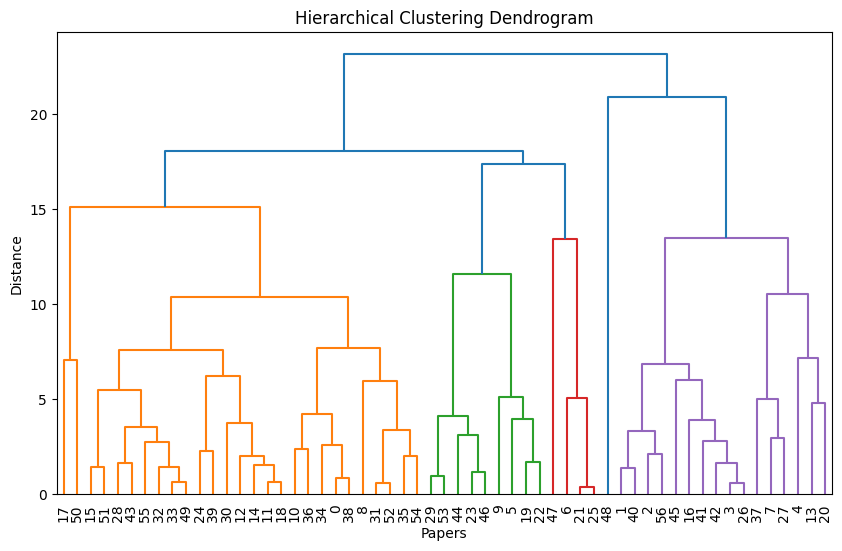

In [150]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

# Perform hierarchical clustering
distance_matrix = sch.distance.pdist(umap_embeddings_array)  # Compute pairwise distances
linkage = sch.linkage(distance_matrix, method='average')  # Perform average linkage
#dendrogram = sch.dendrogram(linkage)

# Plot the dendrogram
plt.figure(figsize=(10, 6))
sch.dendrogram(linkage, leaf_font_size=10)

plt.xlabel('Papers')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

In [151]:
for i, (embedding, paper) in enumerate(zip(umap_embeddings, valid_papers)):
    print(f"Paper ID: {i + 1}")
    print(f"Title: {paper.split('.')[0]}")
    print("-" * 50)

Paper ID: 1
Title: Fault-tolerant quantum algorithm for symmetry-adapted perturbation theory
--------------------------------------------------
Paper ID: 2
Title: Bosonic orbital Su-Schrieffer-Heeger model in a lattice of rings
--------------------------------------------------
Paper ID: 3
Title: Updated analysis of near-threshold heavy quarkonium production for probe of proton's gluonic gravitational form factors
--------------------------------------------------
Paper ID: 4
Title: Neural Wave Functions for Superfluids
--------------------------------------------------
Paper ID: 5
Title: Exploration of Optimizing FPGA-based Qubit Controller for Experiments on Superconducting Quantum Computing Hardware
--------------------------------------------------
Paper ID: 6
Title: Multiple polaritonic edge states in a Su-Schrieffer-Heeger chain strongly coupled to a multimode cavity
--------------------------------------------------
Paper ID: 7
Title: Twisted bilayer graphene at charge neutralit

In [152]:
concatenated_embeddings = np.array([np.concatenate((emb[0], emb[1])) for emb in umap_embeddings])

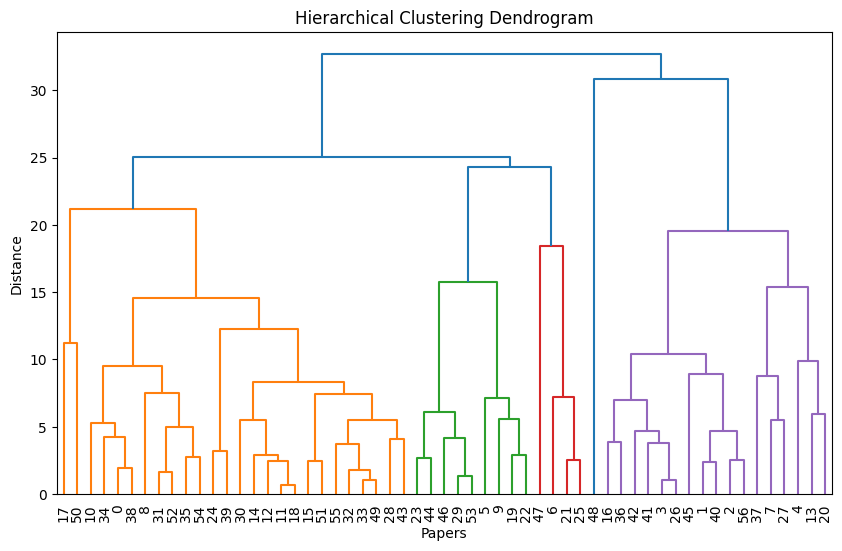

In [153]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

# Perform hierarchical clustering
distance_matrix = sch.distance.pdist(concatenated_embeddings)  # Compute pairwise distances
linkage = sch.linkage(distance_matrix, method='average')  # Perform average linkage

# Plot the dendrogram
plt.figure(figsize=(10, 6))
sch.dendrogram(linkage, leaf_font_size=10)

# Customize the plot with paper IDs as x-axis tick labels
plt.xlabel('Papers')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')
#plt.xticks(ticks=np.arange(1, len(umap_embeddings) + 1), labels=np.arange(1, len(umap_embeddings) + 1))
plt.show()

In [101]:
reducer = umap.UMAP(n_neighbors=4, init='random', n_components=2)
umap_embeddings=list(map(lambda x:reducer.fit_transform(x), koenig_embeddings))

c:\Users\marin\anaconda3\envs\clust-arc\lib\site-packages\umap\umap_.py:2344: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
c:\Users\marin\anaconda3\envs\clust-arc\lib\site-packages\umap\umap_.py:2344: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
c:\Users\marin\anaconda3\envs\clust-arc\lib\site-packages\umap\umap_.py:2344: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
c:\Users\marin\anaconda3\envs\clust-arc\lib\site-packages\umap\umap_.py:2344: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
c:\Users\marin\anaconda3\envs\clust-arc\lib\site-packages\umap\umap_.py:2344: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


Our approach here is getting the centers of the papers embeddings

In [136]:
centers = list()
for embedding in umap_embeddings:
    centers.append([np.mean(embedding[:, 0]), np.mean(embedding[:, 1])])

In [141]:
print(len(centers))
print(len(centers[0]))

57
2


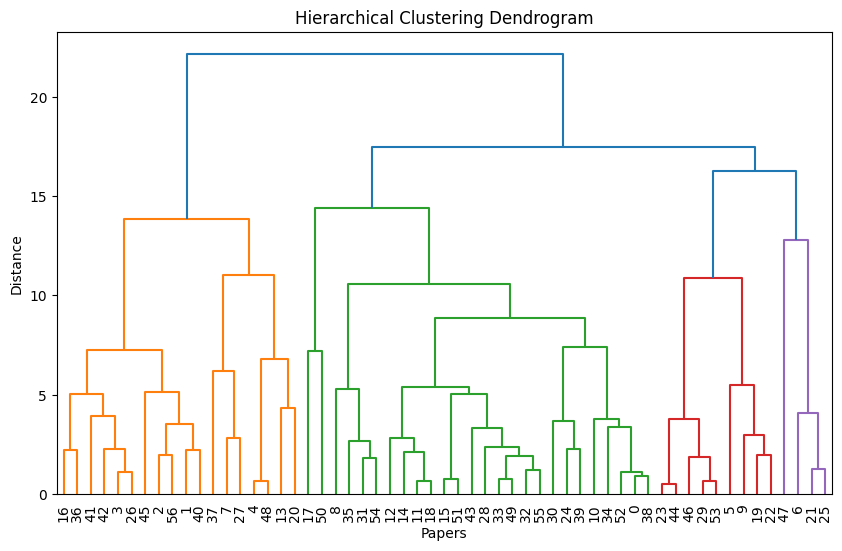

In [142]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
import numpy as np

# Create a list of UMAP embedding centers (57 centers, each with 2 dimensions)
embedding_centers = [[x, y] for x, y in centers]

# Convert the embedding centers to a numpy array
embedding_centers_array = np.array(embedding_centers)

# Compute pairwise distances between the embedding centers
distance_matrix = sch.distance.pdist(embedding_centers_array)  # Compute pairwise distances
linkage = sch.linkage(distance_matrix, method='average')  # Perform average linkage

# Plot the dendrogram
plt.figure(figsize=(10, 6))
sch.dendrogram(linkage, leaf_font_size=10)

# Customize the plot with paper IDs as x-axis tick labels
plt.xlabel('Papers')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

`scipy.cluster.hierarchy.distance.pdist()` function is used to compute the pairwise distances between the embedding centers. By default, this function uses the Euclidean distance metric.

# antoher approach

In [47]:
centers = list()
for embedding in umap_embeddings:
    centers.append([np.mean(embedding[:, 0]), np.mean(embedding[:, 1])])

In [48]:
np.shape(centers)

(323, 2)

In [49]:
from sklearn.neighbors import NearestNeighbors
# n_neighbors = 5 as kneighbors function returns distance of point to itself (i.e. first column will be zeros) 
nbrs = NearestNeighbors(n_neighbors = 6).fit(centers)
# Find the k-neighbors of a point
neigh_dist, neigh_ind = nbrs.kneighbors(centers)
# sort the neighbor distances (lengths to points) in ascending order
# axis = 0 represents sort along first axis i.e. sort along row
sort_neigh_dist = np.sort(neigh_dist, axis = 0)

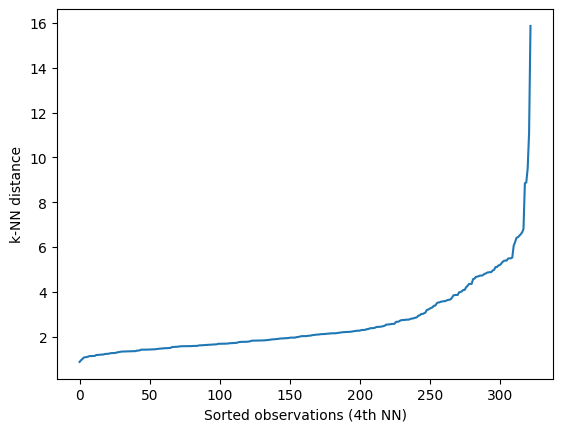

In [50]:
import matplotlib.pyplot as plt

k_dist = sort_neigh_dist[:, 5]
plt.plot(k_dist)
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations (4th NN)")
plt.show()

In [51]:
%pip install kneed

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'c:\\users\\marin\\anaconda3\\envs\\clust-arc\\lib\\site-packages\\numpy-1.24.3.dist-info\\METADATA'



In [52]:
from kneed import KneeLocator
kneedle = KneeLocator(x = range(1, len(neigh_dist)+1), y = k_dist, S = 1.0, 
                      curve = "concave", direction = "increasing", online=True)

# get the estimate of knee point
print(kneedle.knee_y)

ModuleNotFoundError: No module named 'kneed'

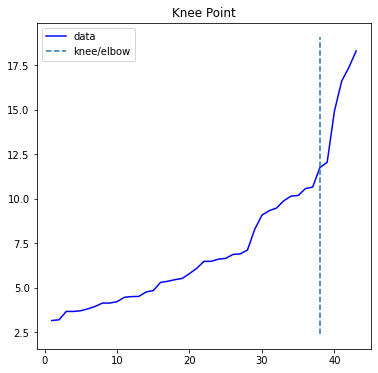

In [ ]:
kneedle.plot_knee()
plt.show()

In [53]:
from sklearn.cluster import DBSCAN
clusters = DBSCAN(eps =3, min_samples = 2).fit(centers)

In [54]:
from collections import Counter
Counter(clusters.labels_)

Counter({0: 279,
         -1: 16,
         1: 2,
         2: 2,
         3: 7,
         4: 2,
         5: 2,
         6: 2,
         7: 3,
         8: 2,
         9: 2,
         10: 2,
         11: 2})

In [55]:
new_centers = np.array(centers, dtype=object)
new_centers.shape

(323, 2)

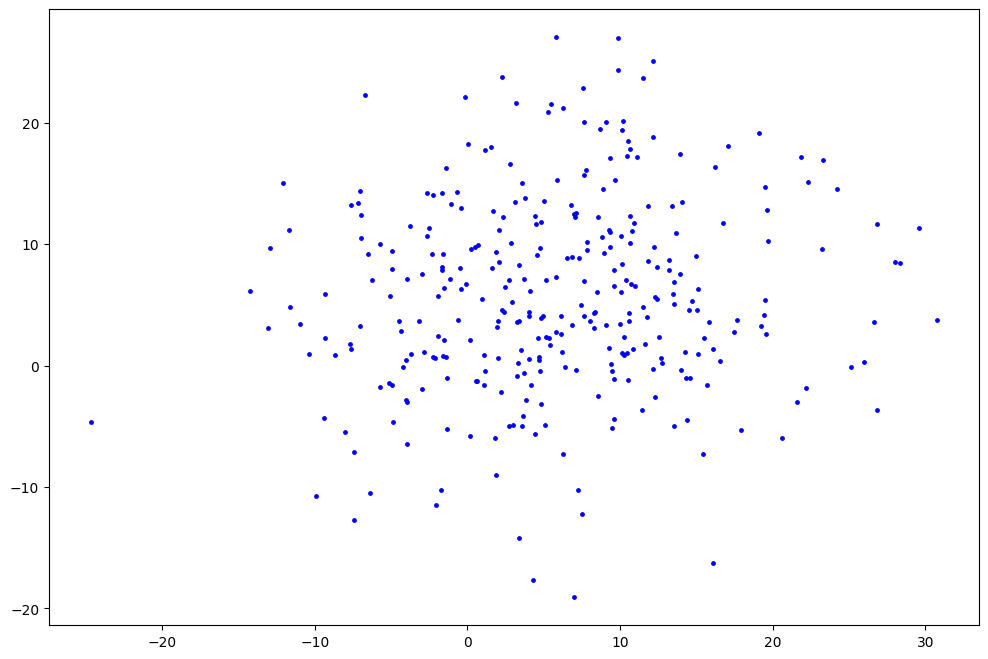

In [56]:
# plot the umap embeddings



plt.figure(figsize=(12,8))
plt.scatter(new_centers[:,0], new_centers[:,1], s=6, c='blue')

In [57]:
import pandas as pd
df = pd.DataFrame(centers)

In [58]:
%pip install -U seaborn

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'c:\\users\\marin\\anaconda3\\envs\\clust-arc\\lib\\site-packages\\numpy-1.24.3.dist-info\\METADATA'



In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
p = sns.scatterplot(data = df, hue = clusters.labels_, legend = "full", palette = "deep")
plt.show()

ValueError: The following variable cannot be assigned with wide-form data: `hue`